# Scikit learn for cross-validating OLS
## Dream Team - ORIE 4741 Project

In [1]:
using CSV, Plots, DataFrames, Statistics, LinearAlgebra, PyCall, Random

In [2]:
include("../plot_pred.jl")

plot_pred_true (generic function with 2 methods)

## Import data

In [3]:
train_df = CSV.read("train.csv", DataFrame);
train = Matrix(train_df);
Xtrain = train[:, 1:(end-3)];

# train_std = train[:, 190];
# train_ppr = train[:, 191];
# train_half = train[:, 192];

train_std = train[:, end-2];
train_ppr = train[:, end-1];
train_half = train[:, end];

test_df = CSV.read("test.csv", DataFrame);
test = Matrix(test_df);
Xtest = test[:, 1:(end-3)];

# test_std = test[:, 190];
# test_ppr = test[:, 191];
# test_half = test[:, 192];

test_std = test[:, end-2];
test_ppr = test[:, end - 1];
test_half = test[:, end];

In [4]:
lm = pyimport("sklearn.linear_model")
ms = pyimport("sklearn.model_selection")
metrics = pyimport("sklearn.metrics")
lr = lm.LinearRegression()

PyObject LinearRegression()

In [5]:
Xtrain

41298×37 Array{Float64,2}:
   0.0    0.0       0.0        0.0     …  1419.91  1.0  0.0  0.0  0.0  0.0
   0.0    0.0       0.0        0.0        1508.48  0.0  1.0  0.0  0.0  0.0
 290.583  1.66667   0.5       38.0833     1334.88  0.0  0.0  1.0  0.0  0.0
   0.0    0.0       0.0        0.0        1569.39  0.0  0.0  0.0  1.0  0.0
 265.286  1.28571   1.14286   41.0        1449.06  0.0  0.0  1.0  0.0  0.0
   0.0    0.0       0.0        0.0     …  1328.26  0.0  0.0  0.0  1.0  0.0
   0.0    0.0       0.0        0.0        1356.26  1.0  0.0  0.0  0.0  0.0
   0.0    0.0       0.0        0.0        1654.3   0.0  1.0  0.0  0.0  0.0
 298.727  1.81818   0.727273  39.0        1498.59  0.0  0.0  1.0  0.0  0.0
   0.0    0.0       0.0        0.0        1623.89  0.0  1.0  0.0  0.0  0.0
 176.333  0.666667  0.333333  27.0     …  1364.78  0.0  0.0  1.0  0.0  0.0
   0.0    0.0       0.0        0.0        1507.64  0.0  0.0  0.0  1.0  0.0
   0.0    0.0       0.0        0.0        1663.06  1.0  0.0  0.0  0.0  0.

Call Python sklearn from Julia.

In [6]:
Random.seed!(0)
lm_cv = ms.cross_validate(lr, Xtrain, train_std, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)

Dict{Any,Any} with 4 entries:
  "fit_time"   => [0.126888, 0.129073, 0.135732, 0.129875, 0.120024, 0.15008, 0…
  "score_time" => [0.0, 0.00199223, 0.0010016, 0.00228548, 0.0, 0.0, 0.00810909…
  "estimator"  => (PyObject LinearRegression(), PyObject LinearRegression(), Py…
  "test_score" => [-32.7123, -32.3912, -34.3238, -34.1187, -32.2424, -31.9607, …

In [7]:
lm_cv["test_score"]

10-element Array{Float64,1}:
 -32.712290467657844
 -32.39120312823243
 -34.3237820752411
 -34.11869618570389
 -32.24237515937187
 -31.960716192560685
 -33.003576140867786
 -32.603846421017515
 -32.19951007165684
 -33.36377308623311

In [8]:
lm_coef = sum([(lm_cv["estimator"][i].coef_) for i in 1:10])/10

37-element Array{Float64,1}:
  0.023707887751678113
  1.0918373374586412
 -0.16185083410524573
 -0.20124999098458324
  0.3261371406681161
  0.08643479095412297
  0.05274602381557303
  1.2953172409537472
 -0.24929737205927274
  0.4279243287886323
  0.04724470136227126
  0.8895775274318074
 -0.11345313277037856
  ⋮
 -0.0025826274867505657
  0.15410405164396776
 -0.27859231108925075
 -0.005429467973753513
 -0.005643022497175067
  0.0037360081133710156
 -0.002372643916292262
 -0.5269504086710047
 -0.07057383470789867
  3.550039896129923
 -0.5312575257514897
 -2.4212581269995277

In [11]:
"""This function computes the mean squared error."""
function MSE(y, pred)
    error = (y.-pred).^2
    mse = sum(error[:, 1])/size(error, 1)
    return mse
end

MSE

Calculate $R^2$ and MSE score.

In [12]:
test_pred = sum(lm_coef'.*Xtest, dims = 2)
MSE(test_std, test_pred)

37.841266494909064

In [15]:
metrics.r2_score(test_std, test_pred)

0.20312738207419234

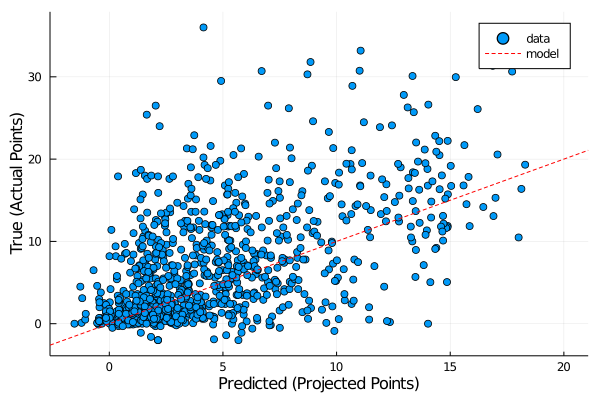

In [16]:
plot_pred_true(test_pred, test_std)

In [17]:
lm_cv_ppr = ms.cross_validate(lr, Xtrain, train_ppr, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)
lm_cv_ppr["test_score"]

10-element Array{Float64,1}:
 -44.889781765989184
 -44.680787086347145
 -47.35464962490363
 -47.0902708117103
 -44.49110394381248
 -44.78073618300054
 -44.593662360954625
 -44.54674117492449
 -44.36031942978478
 -45.78294563698717

In [18]:
# lm_cv_ppr_coef = lm_cv_ppr["estimator"][6].coef_;
lm_cv_ppr_coef = sum([(lm_cv_ppr["estimator"][i].coef_) for i in 1:10])/10

37-element Array{Float64,1}:
  0.024375869485638704
  1.149408089404717
 -0.10349363680162169
 -0.19309371552698013
  0.3179388510667439
  0.05451291115840686
  0.058834156740021945
  1.3629070666109528
  0.040426366369902864
  0.5613432566162394
  0.05370893906045214
  1.0029661585360417
 -0.11195295770236317
  ⋮
 -0.003437271307275425
  0.22572252579831747
 -0.36452524349611254
 -0.005126071311525299
 -0.007409135782364751
  0.004248663311032437
 -0.002416879258731243
 -0.26874221773340734
  0.7939740923768979
  2.692083007631365
  0.23598938381536932
 -3.4533042660902225

In [19]:
lm_cv_half = ms.cross_validate(lr, Xtrain, train_half, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)
lm_cv_half["test_score"]

10-element Array{Float64,1}:
 -38.02907026018333
 -37.76128933227724
 -40.03898436168855
 -39.807961428322656
 -37.610040381473986
 -37.54644329899472
 -38.043569468178134
 -37.82335773432839
 -37.52309633327132
 -38.76886067876641

In [20]:
# lm_cv_half_coef = lm_cv_half["estimator"][6].coef_;
lm_cv_half_coef = sum([(lm_cv_half["estimator"][i].coef_) for i in 1:10])/10

37-element Array{Float64,1}:
  0.024041878618658422
  1.1206227134316782
 -0.13267223545343423
 -0.19717185325578157
  0.32203799586742987
  0.07047385105626489
  0.05579009027779745
  1.32911215378235
 -0.10443550284468488
  0.49463379270243574
  0.050476820211361705
  0.9462718429839247
 -0.11270304523637047
  ⋮
 -0.0030099493970130024
  0.18991328872114238
 -0.321558777292682
 -0.005277769642639462
 -0.006526079139769908
  0.003992335712201744
 -0.002394761587511742
 -0.397846313202206
  0.36170012883449953
  3.121061451880644
 -0.14763407096806008
 -2.937281196544875

In [21]:
test_pred_ppr = sum(lm_cv_ppr_coef'.*Xtest, dims = 2)
test_pred_half = sum(lm_cv_half_coef'.*Xtest, dims = 2);

In [23]:
@show MSE(test_ppr, test_pred_ppr)
@show MSE(test_half, test_pred_half)

MSE(test_ppr, test_pred_ppr) = 52.6542928265193
MSE(test_half, test_pred_half) = 44.40913337624904


44.40913337624904

In [22]:
@show metrics.r2_score(test_ppr, test_pred_ppr)
@show metrics.r2_score(test_half, test_pred_half)

metrics.r2_score(test_ppr, test_pred_ppr) = 0.14168806319583716
metrics.r2_score(test_half, test_pred_half) = 0.1638163911328162


0.1638163911328162

## Export

In [134]:
test_pred_all = CSV.read("test_pred.csv", DataFrame)
test_pred_all.std_ols = vec(test_pred)
test_pred_all.ppr_ols = vec(test_pred_ppr)
test_pred_all.half_ols = vec(test_pred_half);
# CSV.write("$(pwd())\\test_pred.csv", test_pred_all)

"C:\\Users\\darre\\Documents\\_cornell 20-21\\orie 4741\\dream-team\\base models\\test_pred.csv"

In [93]:
test_pred_all

,std_lasso,ppr_lasso,half_lasso,std_ols,ppr_ols,half_ols,std_q
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,8.34245,12.4353,10.4163,5.21642,6.63402,5.21642,5.83232
2,6.21273,9.55399,7.8866,2.70902,3.75263,2.70902,3.15853
3,4.68612,7.50545,6.07766,0.950323,1.72668,0.950323,1.40242
4,5.9337,9.4833,7.72491,2.47799,3.57046,2.47799,3.64539
5,4.18057,6.48689,5.33634,0.194448,0.735826,0.194448,1.99003
6,5.34338,8.22768,6.76977,1.70667,2.55822,1.70667,2.30717
7,4.78523,7.46443,6.10004,0.994758,1.72031,0.994758,3.03987
8,4.40215,7.05279,5.73486,0.541589,1.23197,0.541589,2.09788
9,4.22617,6.29751,5.25614,0.133929,0.568555,0.133929,0.00513357


## Plot

In [82]:
function plotDiagonal_2(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color = :black, linestyle = :dash, label = "True Model", linealpha = 0.7, lw = 2)
end

plotDiagonal_2 (generic function with 1 method)

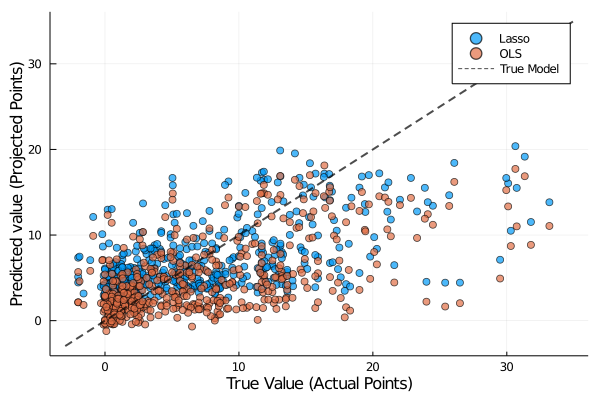

In [155]:
scatter(test_std[1:500], test_pred_all[1:500, :std_lasso], label = "Lasso", seriesalpha = 0.7)
scatter!(test_std[1:500], test_pred_all[1:500, :std_ols], label = "OLS", seriesalpha = 0.7)
# scatter!(test_std[1:500], test_pred_all[1:500, :std_q], label = "Quantile (0.4)", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_std[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :std_ols]) .- minimum(test_pred_all[1:500, :std_ols])), maximum(test_std[1:500]) .+ 0.05*(maximum(test_std[1:500] .- minimum(test_std[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("scatter.png")

In [138]:
# savefig("scatter.png")

In [140]:
scatter(test_std[1:1000], test_pred_all[1:1000, :std_lasso], label = "Lasso", seriesalpha = 0.7)
plotDiagonal(minimum(test_std[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :std_ols]) .- minimum(test_pred_all[1:500, :std_ols])), maximum(test_std[1:500]) .+ 0.05*(maximum(test_std[1:500] .- minimum(test_std[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("lasso_v2.png")

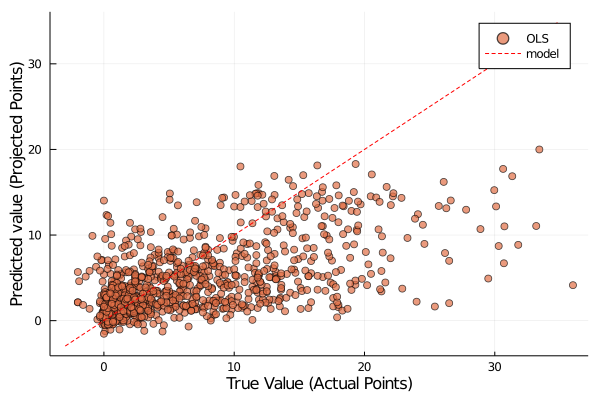

In [143]:
scatter(test_std[1:1000], test_pred_all[1:1000, :std_ols], label = "OLS", seriesalpha = 0.7, color = palette(:default)[2])
plotDiagonal(minimum(test_std[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :std_ols]) .- minimum(test_pred_all[1:500, :std_ols])), maximum(test_std[1:500]) .+ 0.05*(maximum(test_std[1:500] .- minimum(test_std[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("ols_v2.png")

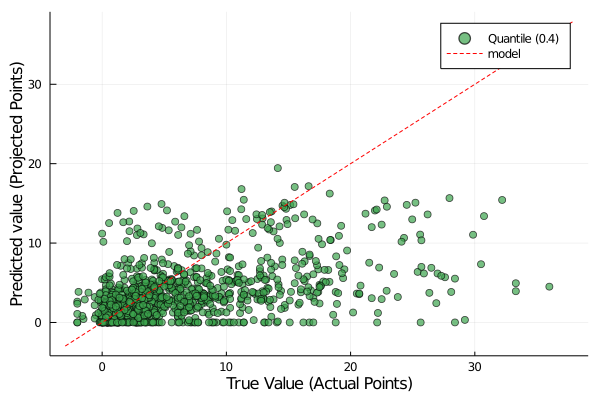

In [102]:
scatter(test_std[1:1000], test_pred_all[1:1000, :std_q], label = "Quantile (0.4)", seriesalpha = 0.7, color = palette(:default)[3])
plotDiagonal(minimum(test_std[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :std_ols]) .- minimum(test_pred_all[1:500, :std_ols])), maximum(test_std[1:500]) .+ 0.05*(maximum(test_std[1:500] .- minimum(test_std[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("quantile_40.png")

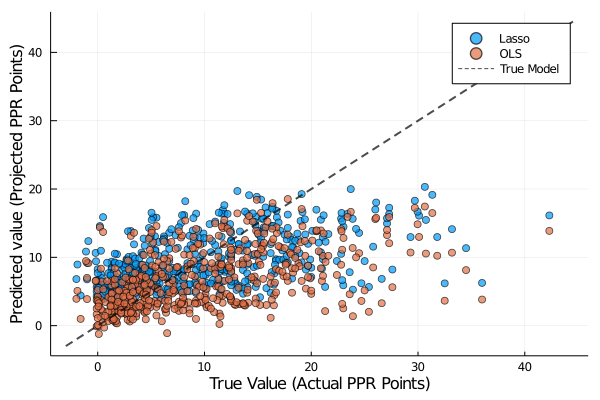

In [147]:
scatter(test_ppr[1:500], test_pred_all[1:500, :ppr_lasso], label = "Lasso", seriesalpha = 0.7)
scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_ols], label = "OLS", seriesalpha = 0.7)
# scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_q], label = "Quantile (0.4)", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_ppr[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :ppr_ols]) .- minimum(test_pred_all[1:500, :ppr_ols])), maximum(test_ppr[1:500]) .+ 0.05*(maximum(test_ppr[1:500] .- minimum(test_ppr[1:500]))))
xlabel!("True Value (Actual PPR Points)")
ylabel!("Predicted value (Projected PPR Points)")
# savefig("ppr_model_comparison.png")

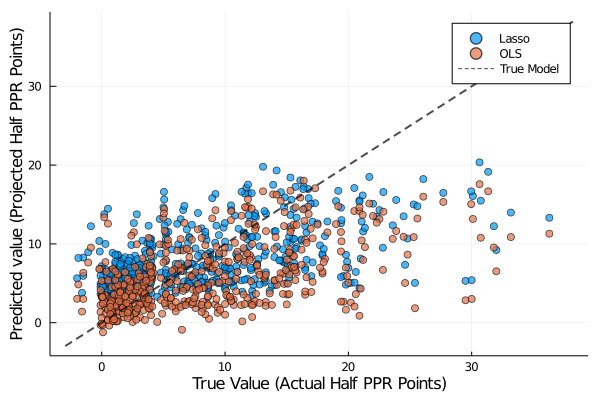

In [149]:
scatter(test_half[1:500], test_pred_all[1:500, :half_lasso], label = "Lasso", seriesalpha = 0.7)
scatter!(test_half[1:500], test_pred_all[1:500, :half_ols], label = "OLS", seriesalpha = 0.7)
# scatter!(test_half[1:500], test_pred_all[1:500, :half_q], label = "Quantile (0.4)", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_half[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :half_ols]) .- minimum(test_pred_all[1:500, :half_ols])), maximum(test_half[1:500]) .+ 0.05*(maximum(test_half[1:500] .- minimum(test_half[1:500]))))
xlabel!("True Value (Actual Half PPR Points)")
ylabel!("Predicted value (Projected Half PPR Points)")
# savefig("half_model_comparison.png")

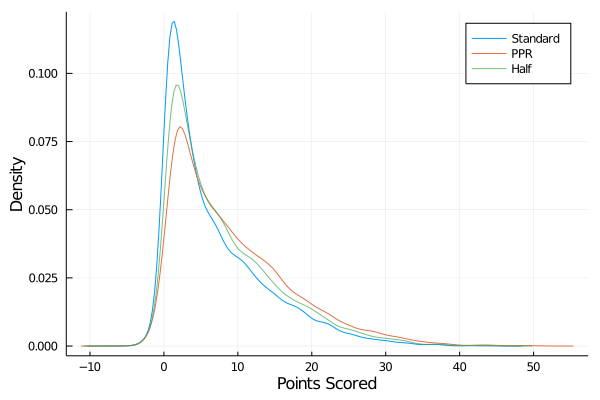

In [107]:
using StatsPlots
density(test_std, label = "Standard")
density!(test_ppr, label = "PPR")
density!(test_half, seriesalpha = 0.7, label = "Half")
xlabel!("Points Scored")
ylabel!("Density")
# savefig("points_density.png")

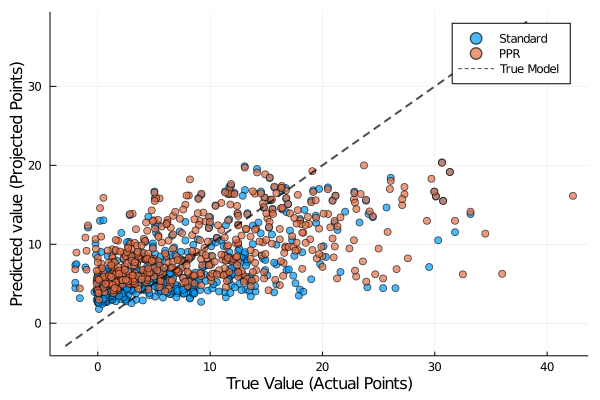

In [150]:
scatter(test_std[1:500], test_pred_all[1:500, :std_lasso], label = "Standard", seriesalpha = 0.7)
scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_lasso], label = "PPR", seriesalpha = 0.7)
# scatter!(test_half[1:500], test_pred_all[1:500, :half_lasso], label = "Half", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_half[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :half_lasso]) .- minimum(test_pred_all[1:500, :half_lasso])), maximum(test_half[1:500]) .+ 0.05*(maximum(test_half[1:500] .- minimum(test_half[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("lass_point_comparison.png")

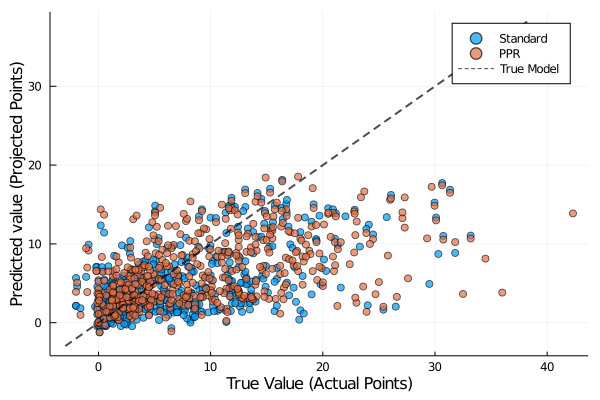

In [151]:
scatter(test_std[1:500], test_pred_all[1:500, :std_ols], label = "Standard", seriesalpha = 0.7)
scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_ols], label = "PPR", seriesalpha = 0.7)
# scatter!(test_half[1:500], test_pred_all[1:500, :half_ols], label = "Half", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_half[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :half_ols]) .- minimum(test_pred_all[1:500, :half_ols])), maximum(test_half[1:500]) .+ 0.05*(maximum(test_half[1:500] .- minimum(test_half[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")

In [153]:
scatter(test_std[1:500], test_pred_all[1:500, :std_q], label = "Standard", seriesalpha = 0.7)
scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_q], label = "PPR", seriesalpha = 0.7)
scatter!(test_half[1:500], test_pred_all[1:500, :half_q], label = "Half", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_half[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :half_q]) .- minimum(test_pred_all[1:500, :half_q])), maximum(test_half[1:500]) .+ 0.05*(maximum(test_half[1:500] .- minimum(test_half[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")

LoadError: ArgumentError: column name :std_q not found in the data frame